<a href="https://colab.research.google.com/github/raziyasultan/AI_ML_internship/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Modules**

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Connecting drive and google colab**

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Interquartile Range (IQR):**

**The interquartile range is a measure of statistical dispersion, or in simple terms, it represents the spread of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1). Mathematically, IQR = Q3 - Q1. The IQR is less sensitive to outliers than the range and provides a more robust measure of variability.**

**Range**  is the difference between the maximum and minimum values and provides a broad sense of the spread of the entire dataset. However, it can be heavily influenced by outliers.

**Interquartile Range (IQR)** focuses on the middle 50% of the data, making it less sensitive to extreme values. It is a robust measure of variability and is particularly useful when the dataset contains outliers.


**Skewness:**

**Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable. A negative skewness indicates that the distribution of the data is skewed to the left (tail on the left side is longer or fatter), while a positive skewness indicates a skew to the right (tail on the right side is longer or fatter). The skewness value can range from negative infinity to positive infinity, with zero indicating a perfectly symmetrical distribution.**

**As the skew ness is positive we can say that it is skewed to the right side(positive skewness).This can also be observed from the boxplot as the length of whiskers is more in right side. This can also be observed using quartile differences alse.**

**Kurtosis:**

**Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. It describes the shape of the distribution's tails in relation to the normal distribution. Positive kurtosis (leptokurtic) indicates it is having peake more than the normal distribution, while negative kurtosis (platykurtic) indicates it is flatened than normal distribution . A kurtosis of 0 (mesokurtic) implies that it is similar to a normal distribution.**

**Loading Dataset 2**

In [79]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')

In [80]:
df1.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,162999.000000,163003.000000,163003.000000,163003.000000,162637.000000,1.630030e+05,1.629990e+05
mean,98170.717422,2020.258449,63.382183,1198.344632,29.226861,2.153918e+08,5.297368e+10
std,2467.998984,3.005057,94.323062,8825.505678,14.841717,7.874180e+07,1.612977e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.762441e+08,5.303301e+10
50%,98122.000000,2021.000000,13.000000,0.000000,33.000000,2.209718e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.000000,42.000000,2.495753e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


**Finding all quartile values and IQR**

In [81]:
Q1 = df1['Model Year'].quantile(0.25)
Q2 = df1['Model Year'].quantile(0.50)
Q3 = df1['Model Year'].quantile(0.75)
IQR = Q3 - Q1
print("\nFirst Quartile (Q1):", Q1)
print("\nSecond Quartile (Q2):" ,Q2)
print("\nThird Quartile (Q3):" ,Q3)
print("\nInterquartile Range (IQR) for Model Year is :", IQR)


First Quartile (Q1): 2018.0

Second Quartile (Q2): 2021.0

Third Quartile (Q3): 2023.0

Interquartile Range (IQR) for Model Year is : 5.0


**First quartile is the median of 50% data and minimum value where as Third quartile is the median of maximum value and 50% data.and Second quartile is the median of minimum and maximum values.these quartiles divide data set into four parts**

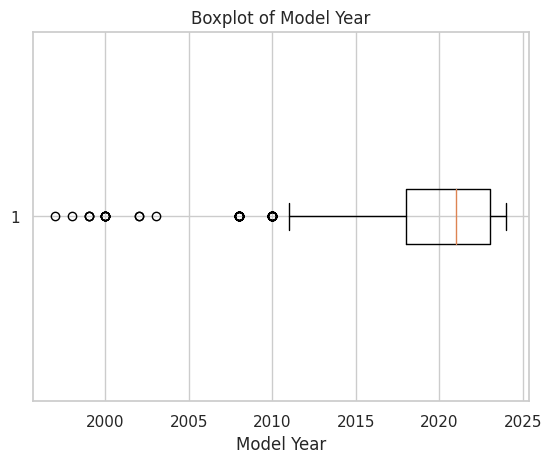

In [82]:
plt.boxplot(df1['Model Year'],vert= False)
plt.title('Boxplot of Model Year')
plt.xlabel('Model Year')
plt.show()


**In the above plot we are having otliers. the data points which are not in range of minimum and maximum values range. the length of whiskers at left side is more so it is skewed to left side ie. Negative skewed**

In [83]:
from scipy import stats
skewness = stats.skew(df1['Model Year'])
print("\nSkewness:", round(skewness,4))


Skewness: -1.0576


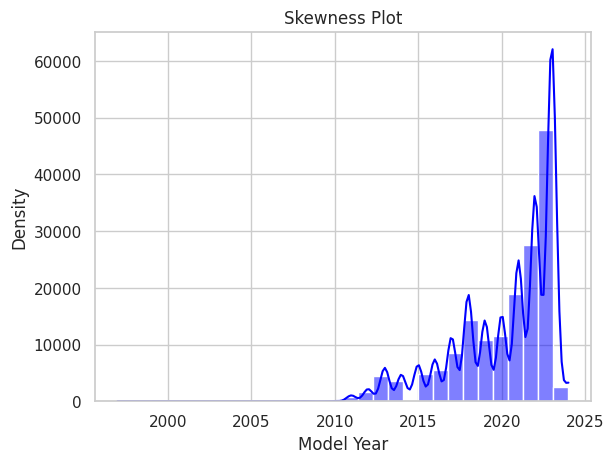

In [84]:
sns.histplot(df1['Model Year'], kde=True, color='blue', bins=30)
plt.xlabel('Model Year')
plt.ylabel('Density')
plt.title('Skewness Plot')

plt.show()

In [85]:
kurtosis = stats.kurtosis(df1['Model Year'])
print("Kurtosis:", round(kurtosis,4))

Kurtosis: 0.3951


**positive Kurtosis means that it has peak than the normal distribution**

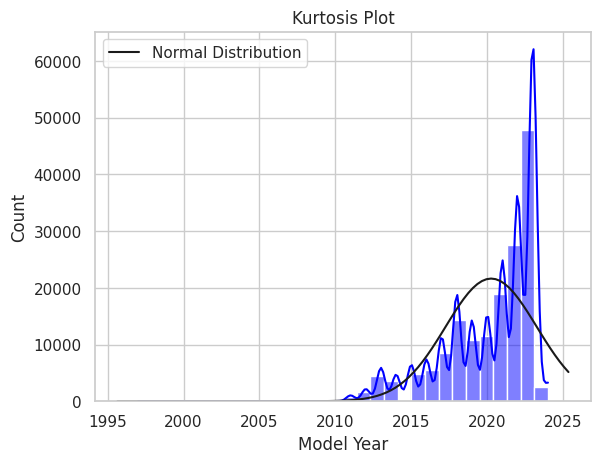

In [86]:
sns.histplot(df1['Model Year'], kde=True, color='blue', bins=30)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, np.mean(df1['Model Year']), np.std(df1['Model Year']))
plt.plot(x, y * len(df1['Model Year']) * np.diff(np.unique(df1['Model Year']))[0], 'k',label='Normal Distribution')
plt.title('Kurtosis Plot')
plt.legend()
plt.show()